# Guided Capstone Step 3 Exploratory Data Analysis

With Data Wrangling out of the way, it's time to move into the Exploratory Data Analysis phase of this guided capstone. In this exercise, you'll learn to build data profiles and plots, including a relationship plot and a data correlation plot. You'll also implement k-means clustering, complete clusters, and update a dataframe as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as you did in step 2 of the guided capstone. Print out your current working directory to confirm you are in the correct project directory. </font>**

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [182]:
dir_path = os.getcwd()
file_path = os.path.join(dir_path, 'data/step2_output.csv')

**<font color='teal'> If you need to change your path, refer back to step 2 to review how to do this. Load the csv file you created in step 2. Remember, it should be saved inside your data subfolder. Print the first five rows.</font>**

In [183]:
df = pd.read_csv(file_path)
df = df.iloc[:,1:]
df.head()

Name   Region    state  summit_elev  vertical_drop  \
0       Alyeska Resort   Alaska   Alaska         3939           2500   
1  Eaglecrest Ski Area   Alaska   Alaska         2600           1540   
2     Hilltop Ski Area   Alaska   Alaska         2090            294   
3     Arizona Snowbowl  Arizona  Arizona        11500           2300   
4  Sunrise Park Resort  Arizona  Arizona        11100           1800   

   base_elev  trams  fastEight  fastSixes  fastQuads  ...  LongestRun_mi  \
0        250      1        0.0          0          2  ...            1.0   
1       1200      0        0.0          0          0  ...            2.0   
2       1796      0        0.0          0          0  ...            1.0   
3       9200      0        0.0          1          0  ...            2.0   
4       9200      0        0.0          0          1  ...            1.2   

   SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
0             1610.0           113.0             150.0       60.0   
1              640.0            60.0              45.0       44.0   
2               30.0            30.0             150.0       36.0   
3              777.0           104.0             122.0       81.0   
4              800.0            80.0             115.0       49.0   

   averageSnowfall  AdultWeekday  AdultWeekend  projectedDaysOpen  \
0            669.0          65.0          85.0              150.0   
1            350.0          47.0          53.0               90.0   
2             69.0          30.0          34.0              152.0   
3            260.0          89.0          89.0              122.0   
4            250.0          74.0          78.0              104.0   

   NightSkiing_ac  
0      550.000000  
1      100.395722  
2       30.000000  
3      100.395722  
4       80.000000  

[5 rows x 27 columns]

# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [184]:
df.describe()

summit_elev  vertical_drop     base_elev       trams   fastEight  \
count    330.000000     330.000000    330.000000  330.000000  330.000000   
mean    4591.818182    1215.427273   3374.000000    0.172727    0.003030   
std     3735.535934     947.864557   3117.121621    0.559946    0.055048   
min      315.000000      60.000000     70.000000    0.000000    0.000000   
25%     1403.750000     461.250000    869.000000    0.000000    0.000000   
50%     3127.500000     964.500000   1561.500000    0.000000    0.000000   
75%     7806.000000    1800.000000   6325.250000    0.000000    0.000000   
max    13487.000000    4425.000000  10800.000000    4.000000    1.000000   

        fastSixes   fastQuads        quad     triple      double  ...  \
count  330.000000  330.000000  330.000000  330.00000  330.000000  ...   
mean     0.184848    1.018182    0.933333    1.50000    1.833333  ...   
std      0.651685    2.198294    1.312245    1.61913    1.815028  ...   
min      0.000000    0.000000    0.000000    0.00000    0.000000  ...   
25%      0.000000    0.000000    0.000000    0.00000    1.000000  ...   
50%      0.000000    0.000000    0.000000    1.00000    1.000000  ...   
75%      0.000000    1.000000    1.000000    2.00000    3.000000  ...   
max      6.000000   15.000000    8.000000    8.00000   14.000000  ...   

       LongestRun_mi  SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  \
count     330.000000         330.000000      330.000000        330.000000   
mean        1.433231         739.801223      164.436364        114.391725   
std         1.147352        1807.868079      243.766413         32.956501   
min         0.000000           8.000000        2.000000          3.000000   
25%         0.600000          85.000000       55.000000        100.000000   
50%         1.000000         200.000000      100.000000        110.500000   
75%         2.000000         739.801223      192.000000        133.000000   
max         6.000000       26819.000000     3379.000000        305.000000   

         yearsOpen  averageSnowfall  AdultWeekday  AdultWeekend  \
count   330.000000       330.000000    330.000000    330.000000   
mean     63.656535       183.203145     57.916957     64.166810   
std     109.263494       134.566629     23.898798     22.571324   
min       6.000000        18.000000     15.000000     17.000000   
25%      50.000000        70.000000     43.000000     49.000000   
50%      58.000000       144.000000     57.916957     64.166810   
75%      68.750000       289.535714     67.000000     72.000000   
max    2019.000000       669.000000    179.000000    179.000000   

       projectedDaysOpen  NightSkiing_ac  
count         330.000000      330.000000  
mean          119.183433      100.395722  
std            30.980111       79.076753  
min            30.000000        2.000000  
25%           100.000000       60.000000  
50%           118.500000      100.395722  
75%           137.750000      100.395722  
max           305.000000      650.000000  

[8 rows x 24 columns]

**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric feature in your dataset and to build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000240262D7BC8>,
      dtype=object)

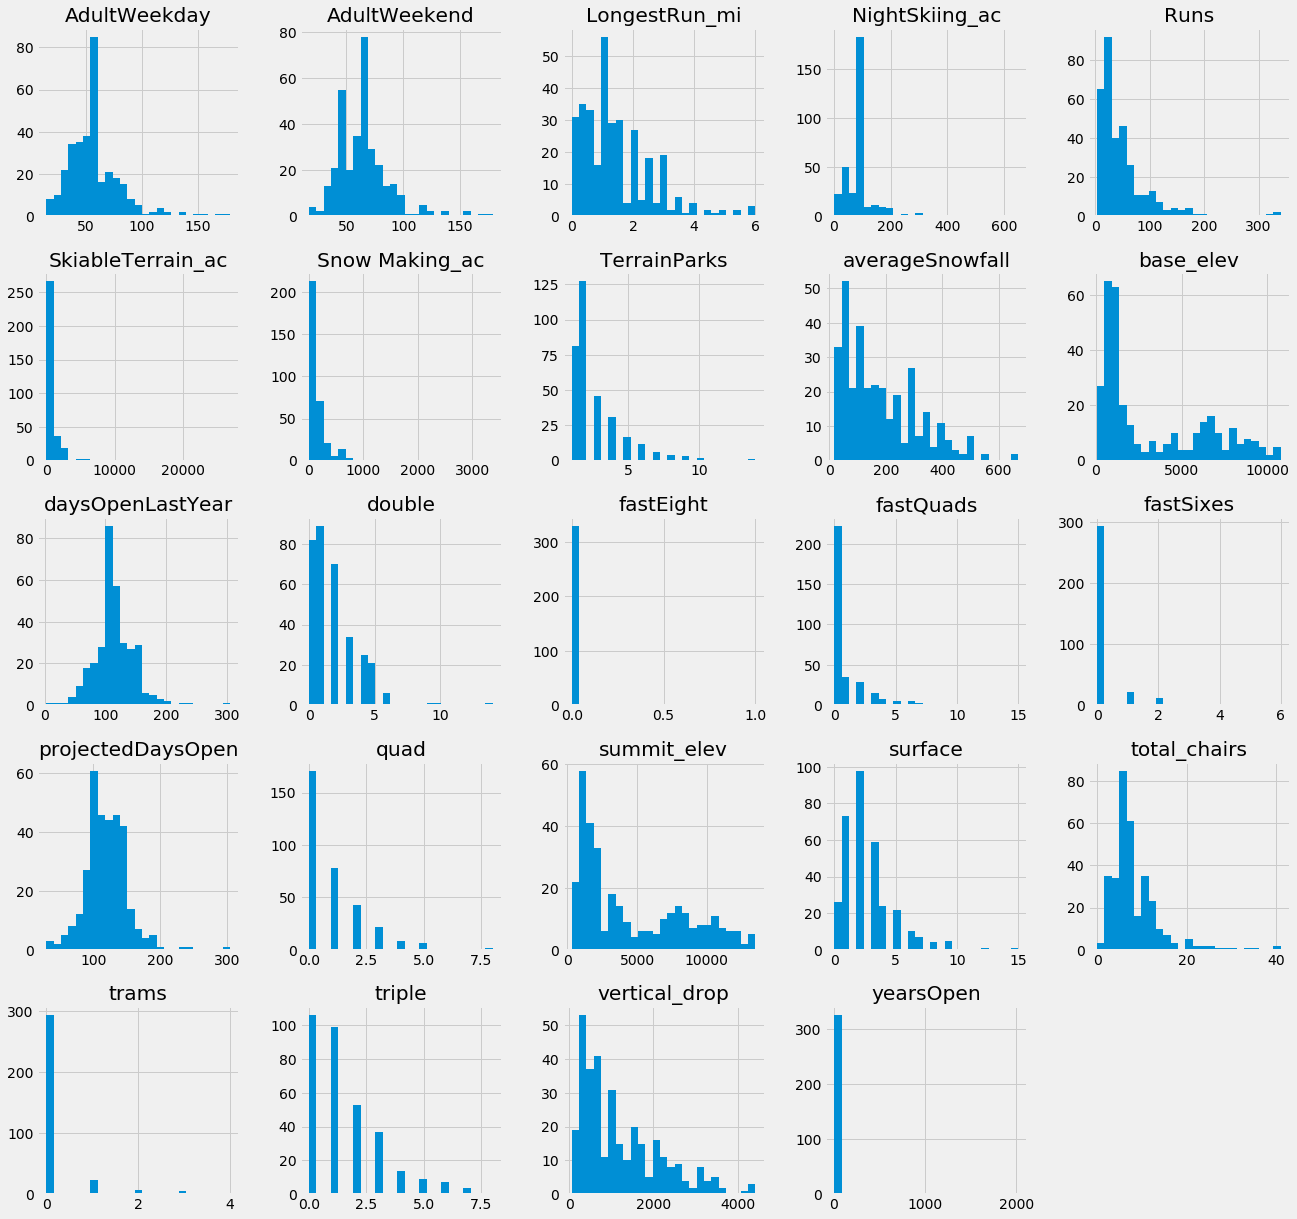

In [185]:
df.hist(figsize = (20, 20), bins=25)

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**<font color='teal'> Okay, now you should be getting a sense for what the data looks like. Let's create a barplot for the categorical features `Region` and `State` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

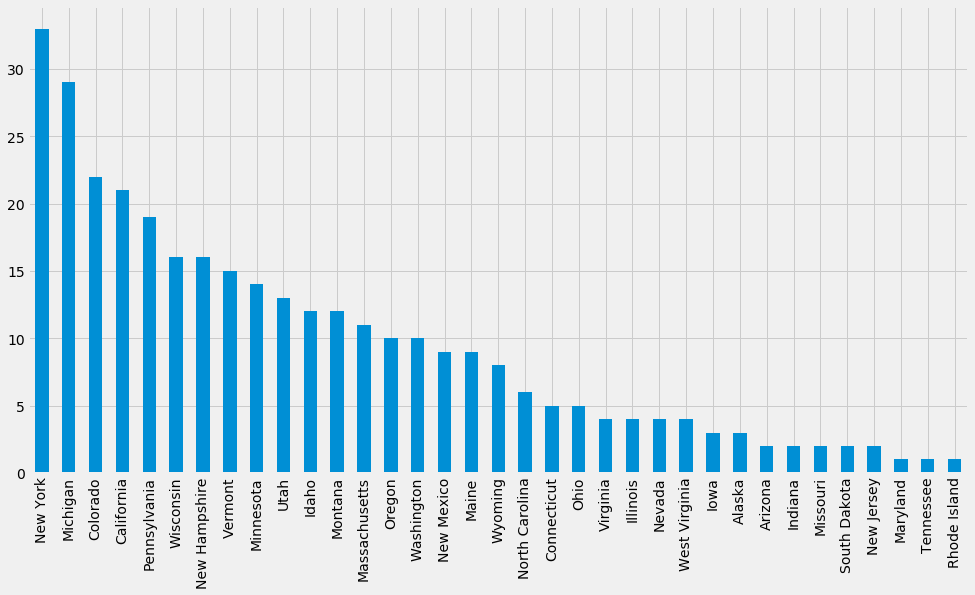

In [186]:
df['state'].value_counts().plot.bar(figsize=(15,8))

**<font color='teal'>Region Levels Plot</font>**

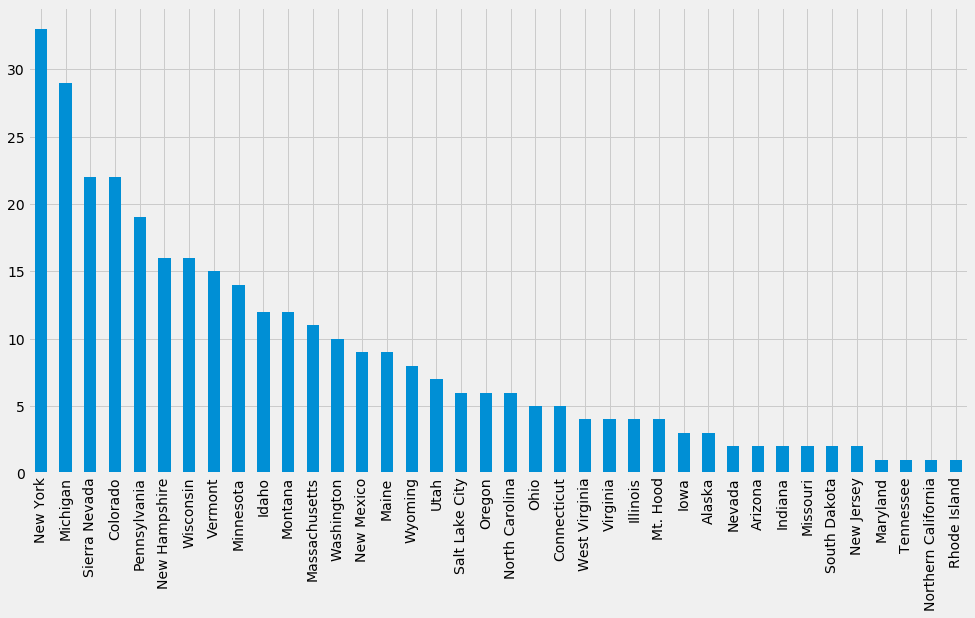

In [187]:
df['Region'].value_counts().plot.bar(figsize=(15,8))

By reviewing the State and Region count plots, you should notice that the Region feature is nearly identical to the State feature and therfore you can remove the Region column from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [188]:
df = df.drop(columns='Region')

## Anamolies & outliers - review boxplots

**<font color='teal'> Print a boxplot for every column</font>**

C:\Users\Donghyeok\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Donghyeok\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Donghyeok\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam

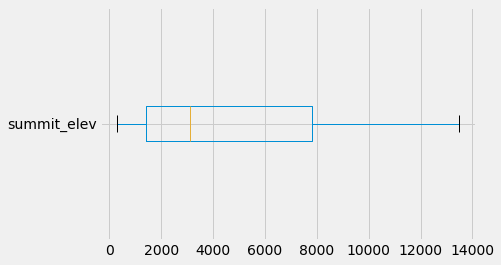

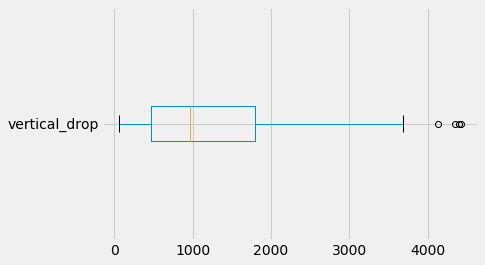

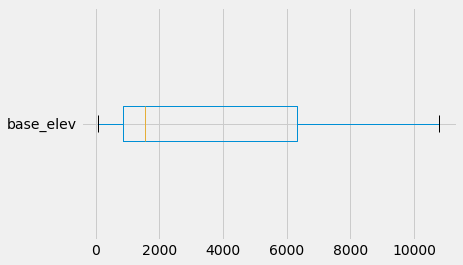

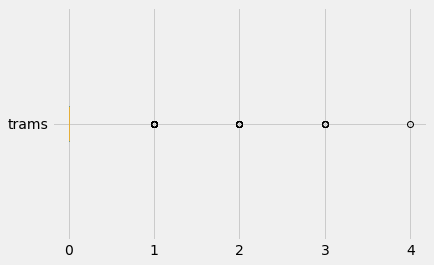

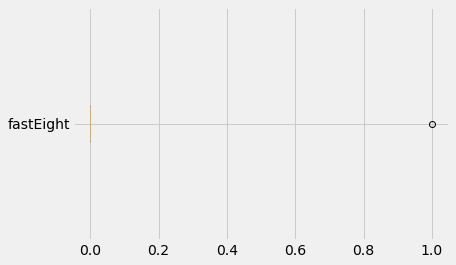

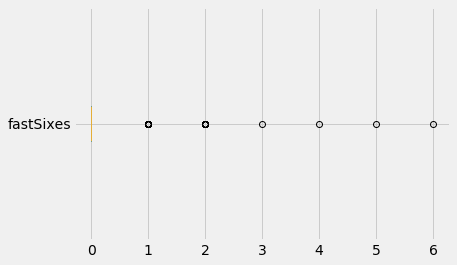

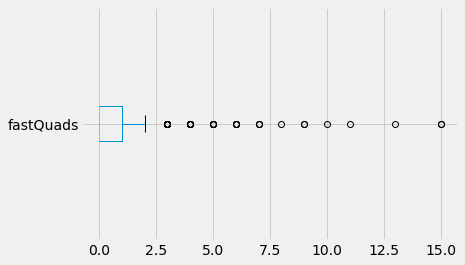

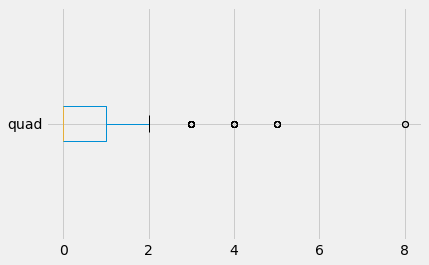

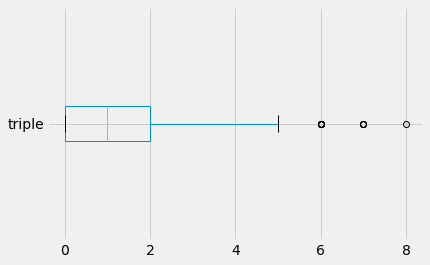

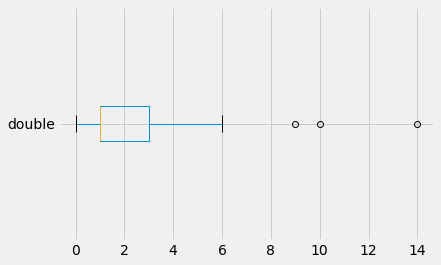

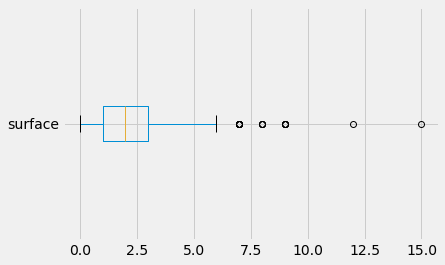

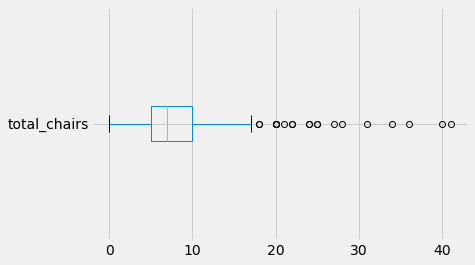

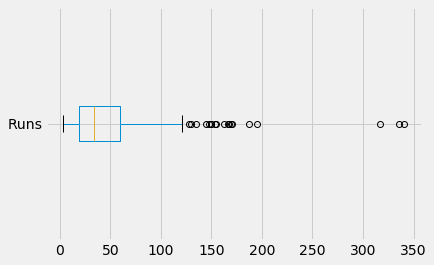

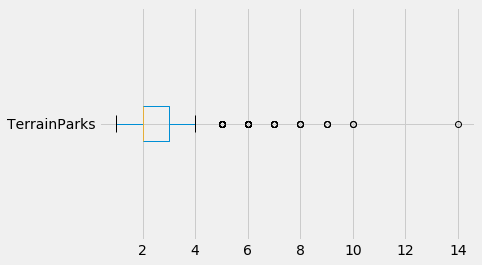

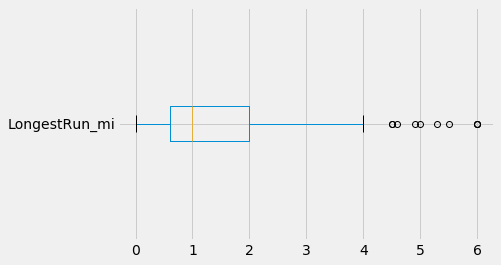

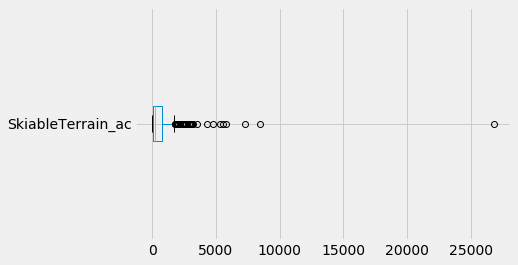

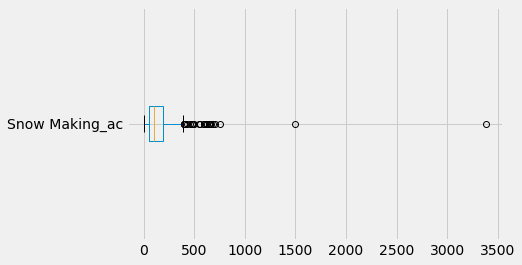

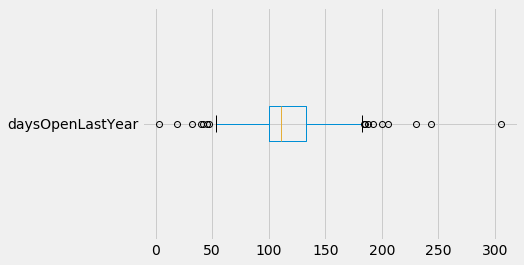

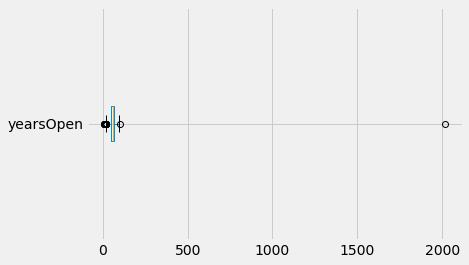

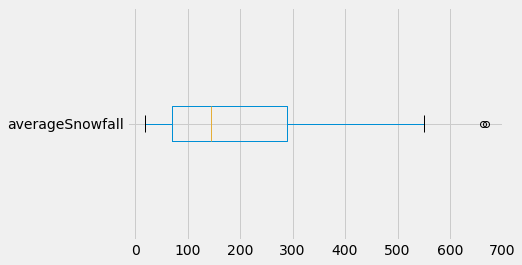

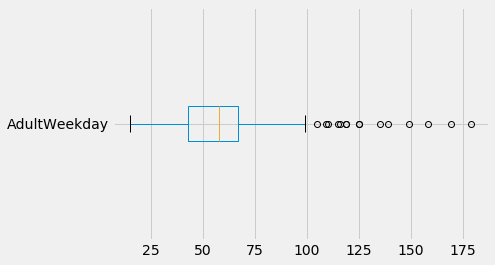

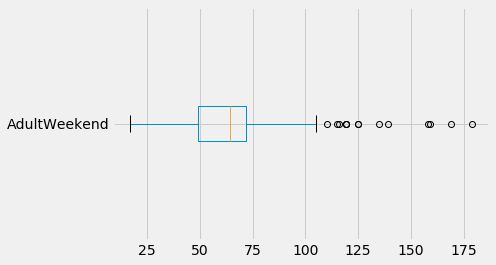

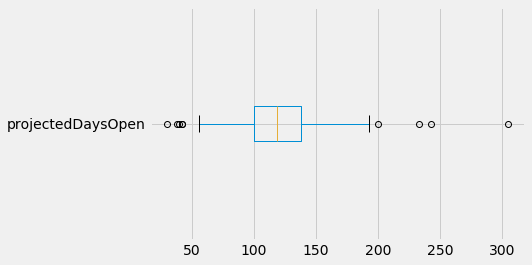

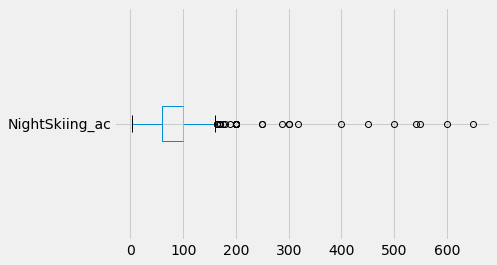

In [189]:
for column in df.iloc[:,2:]:
    plt.figure()
    df.boxplot([column], figsize=(0.5,0.5), vert = False)

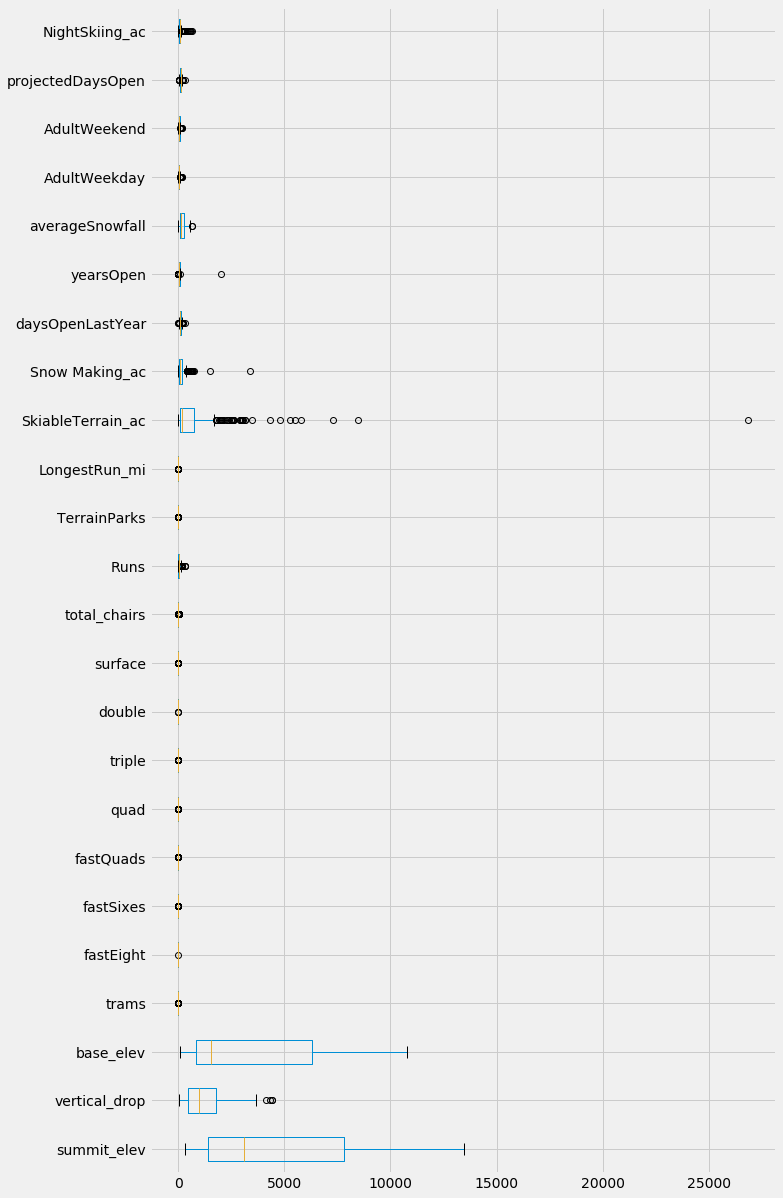

In [190]:
df.boxplot(figsize=(10, 20), vert=False)

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations, or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)  
<font color='teal'>**Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed**</font>

In [191]:
Q1 = df.quantile(0.25) #low value
Q3 = df.quantile(0.75) #higher value
IQR = Q3 - Q1
LQ = df.quantile(0.05)
HQ = df.quantile(0.99)

In [192]:
df[['SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen']] = \
df[['SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen']]\
[~((df[['SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen']] > (HQ)) |
   ((df[['SkiableTerrain_ac', 'Snow Making_ac', 'yearsOpen']] < 0)))]

In [193]:
df = df.dropna()

C:\Users\Donghyeok\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Donghyeok\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Donghyeok\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam

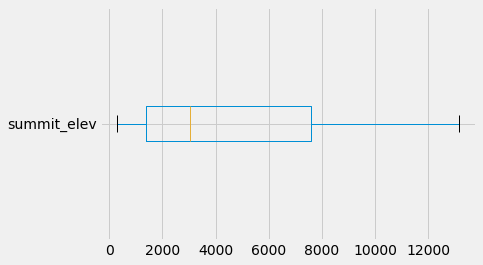

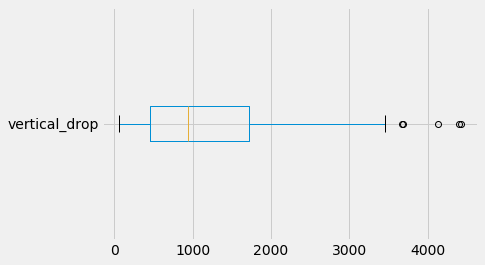

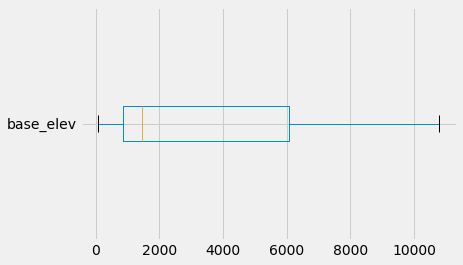

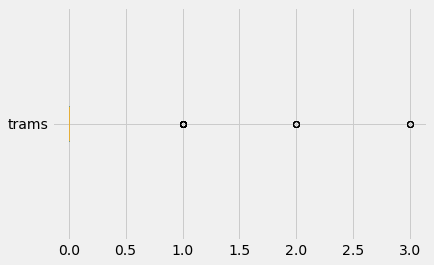

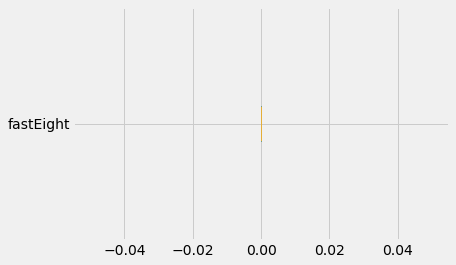

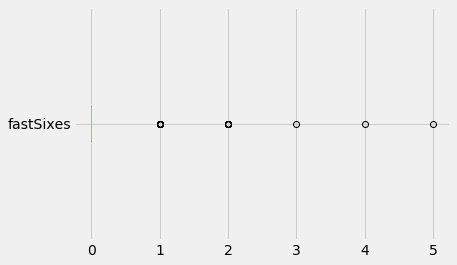

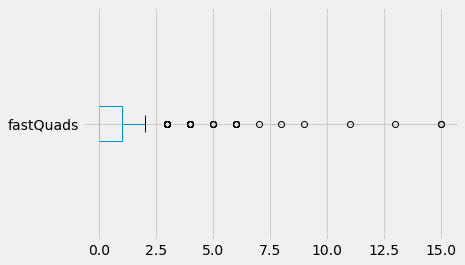

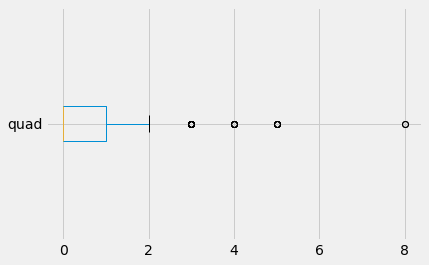

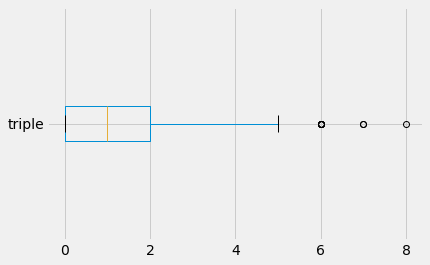

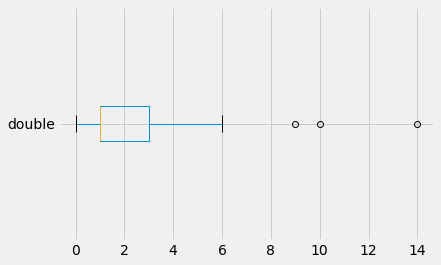

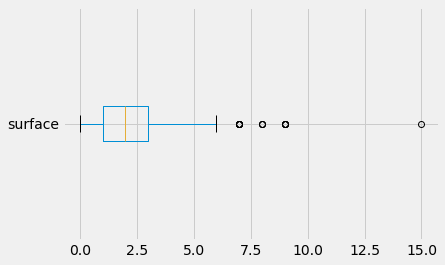

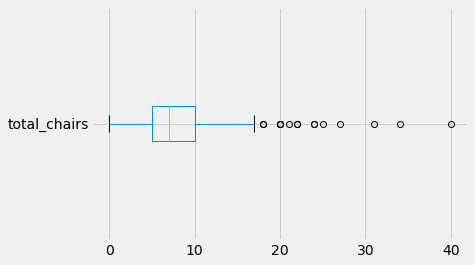

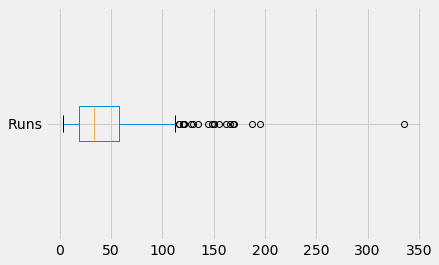

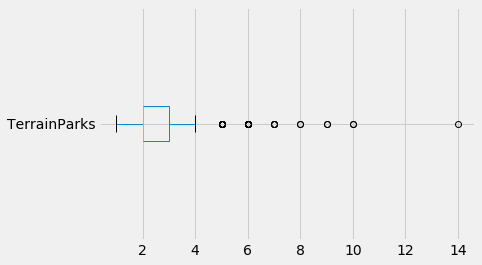

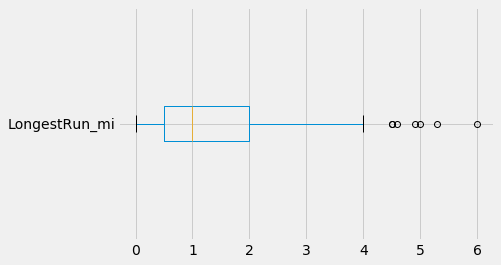

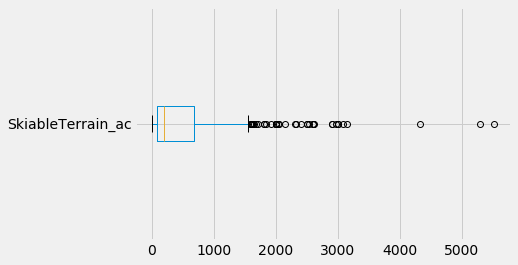

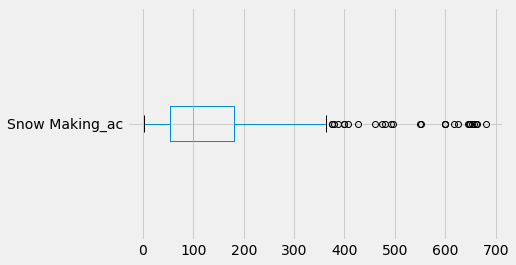

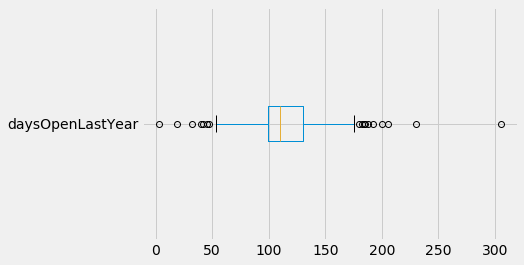

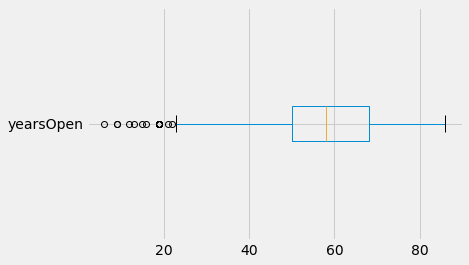

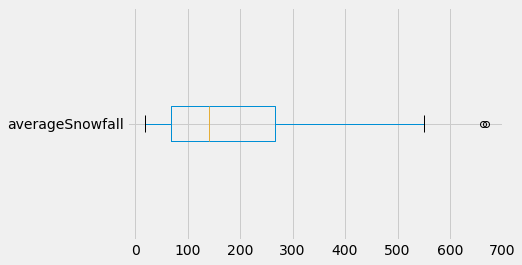

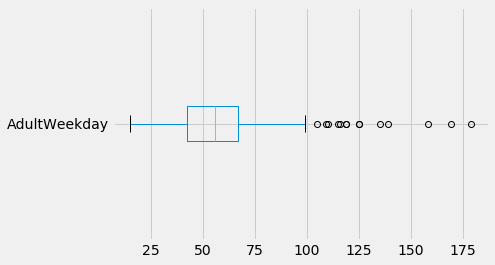

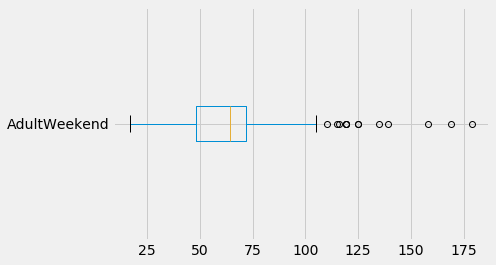

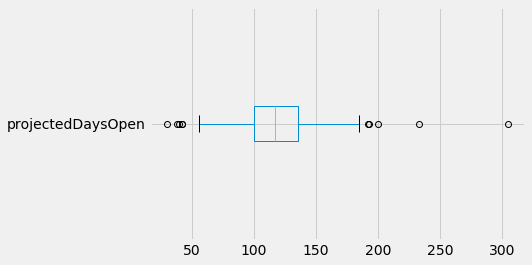

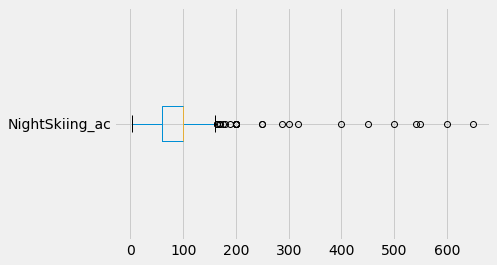

In [194]:
for column in df.iloc[:,2:]:
    plt.figure()
    df.boxplot([column], figsize=(0.5,0.5), vert = False)

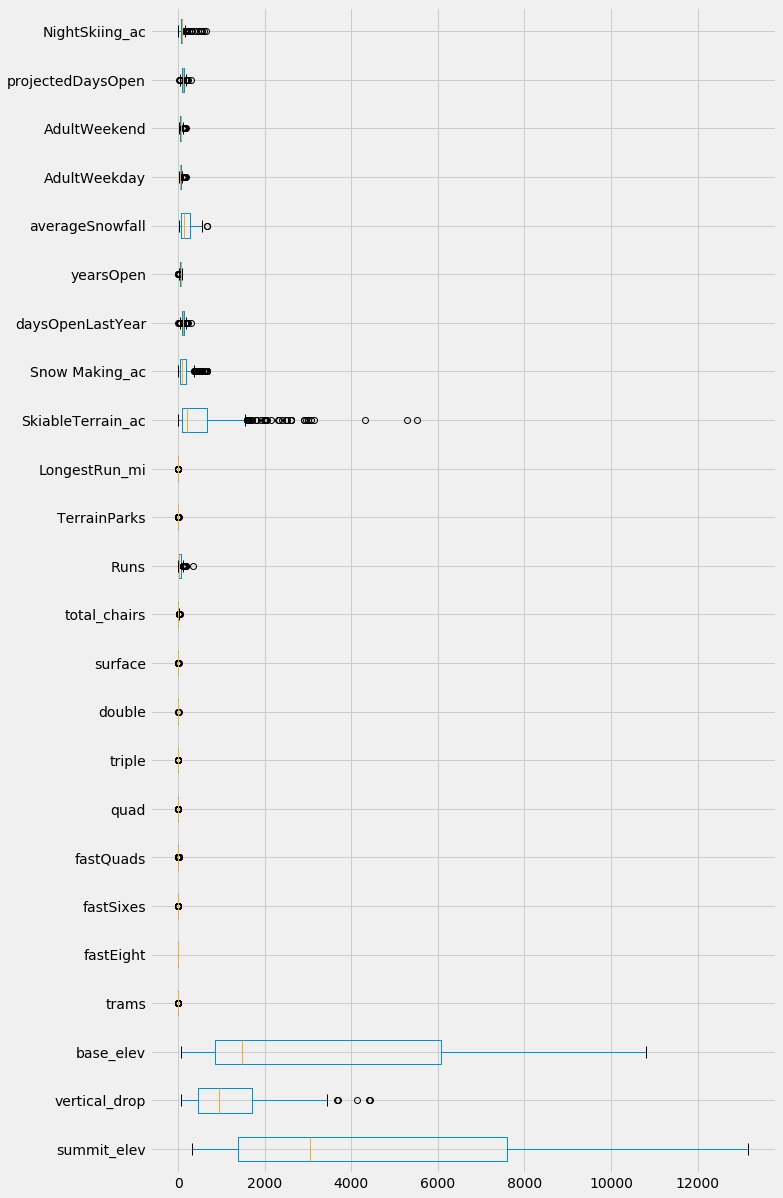

In [195]:
df.boxplot(figsize=(10, 20), vert=False)

There are many possible response variables you could have identified during Step 1 of the guided capstone. However, for the rest of this guided capstone project, you will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, you need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, you'll want to predict the number of days the mountain is open each season.

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

Text(0, 0.5, 'Probability Density')

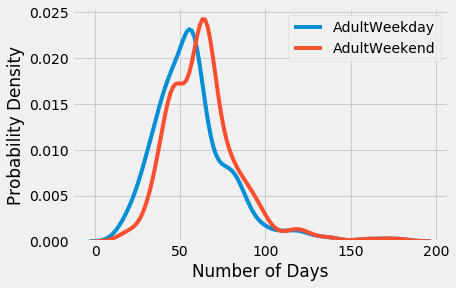

In [196]:
sns.kdeplot(df['AdultWeekday'])
sns.kdeplot(df['AdultWeekend'])
plt.xlabel('Number of Days')
plt.ylabel('Probability Density')

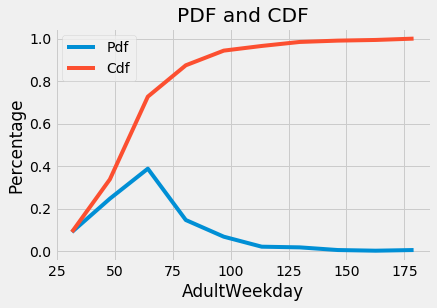

In [197]:
weekday_counts, weekday_bin_edges = np.histogram(df['AdultWeekday'].dropna(), bins=10, density=False)
weekday_pdf = weekday_counts/(sum(weekday_counts))
weekday_cdf = np.cumsum(weekday_pdf)
plt.title('PDF and CDF')
plt.xlabel("AdultWeekday")
plt.ylabel("Percentage")
plt.plot(weekday_bin_edges[1:], weekday_pdf)
plt.plot(weekday_bin_edges[1:], weekday_cdf)
plt.legend(('Pdf','Cdf'))
plt.show()

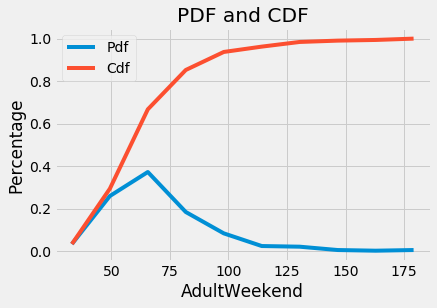

In [198]:
weekend_counts, weekend_bin_edges = np.histogram(df['AdultWeekend'].dropna(), bins=10, density=False)
weekend_pdf = weekend_counts/(sum(weekend_counts))
weekend_cdf = np.cumsum(weekend_pdf)
plt.title('PDF and CDF')
plt.xlabel("AdultWeekend")
plt.ylabel("Percentage")
plt.plot(weekend_bin_edges[1:], weekend_pdf)
plt.plot(weekend_bin_edges[1:], weekend_cdf)
plt.legend(('Pdf','Cdf'))
plt.show()

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

Text(0, 0.5, 'Probability Density')

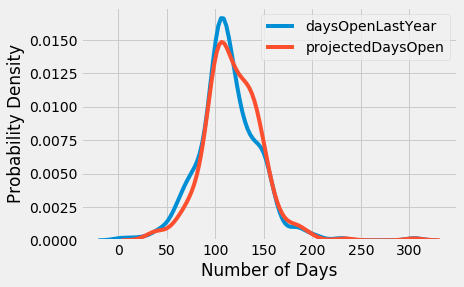

In [199]:
sns.kdeplot(df['daysOpenLastYear'])
sns.kdeplot(df['projectedDaysOpen'])
plt.xlabel('Number of Days')
plt.ylabel('Probability Density')

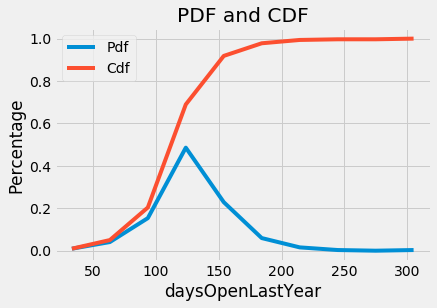

In [200]:
dOLY_counts, dOLY_bin_edges = np.histogram(df['daysOpenLastYear'].dropna(), bins=10, density=False)
daysOpen_pdf = dOLY_counts/(sum(dOLY_counts))
daysOpen_cdf = np.cumsum(daysOpen_pdf)
plt.legend(('pdf'))
plt.title('PDF and CDF')
plt.xlabel("daysOpenLastYear")
plt.ylabel("Percentage")
plt.plot(dOLY_bin_edges[1:], daysOpen_pdf)
plt.plot(dOLY_bin_edges[1:], daysOpen_cdf)
plt.legend(('Pdf','Cdf'))
plt.show()

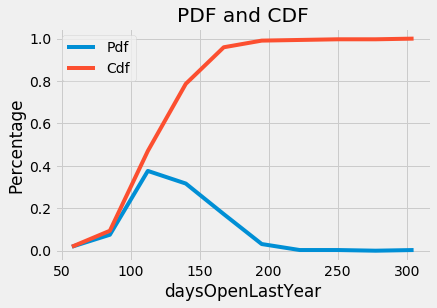

In [201]:
pDO_counts, pDO_bin_edges = np.histogram(df['projectedDaysOpen'].dropna(), bins=10, density=False)
daysOpen_pdf = pDO_counts/(sum(pDO_counts))
daysOpen_cdf = np.cumsum(daysOpen_pdf)
plt.legend(('pdf'))
plt.title('PDF and CDF')
plt.xlabel("daysOpenLastYear")
plt.ylabel("Percentage")
plt.plot(pDO_bin_edges[1:], daysOpen_pdf)
plt.plot(pDO_bin_edges[1:], daysOpen_cdf)
plt.legend(('Pdf','Cdf'))
plt.show()

After reviewing these response varible distributions, there doesn't appear to be any data issues to mitigate. Now, you'll move on to investigating feature relationships and interactions between the features and the response.

# Explore data relationships

<font color='teal'>**Create pairplots, or what is commonly referred to as biplots**</font>

C:\Users\Donghyeok\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Donghyeok\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1440x1440 with 0 Axes>

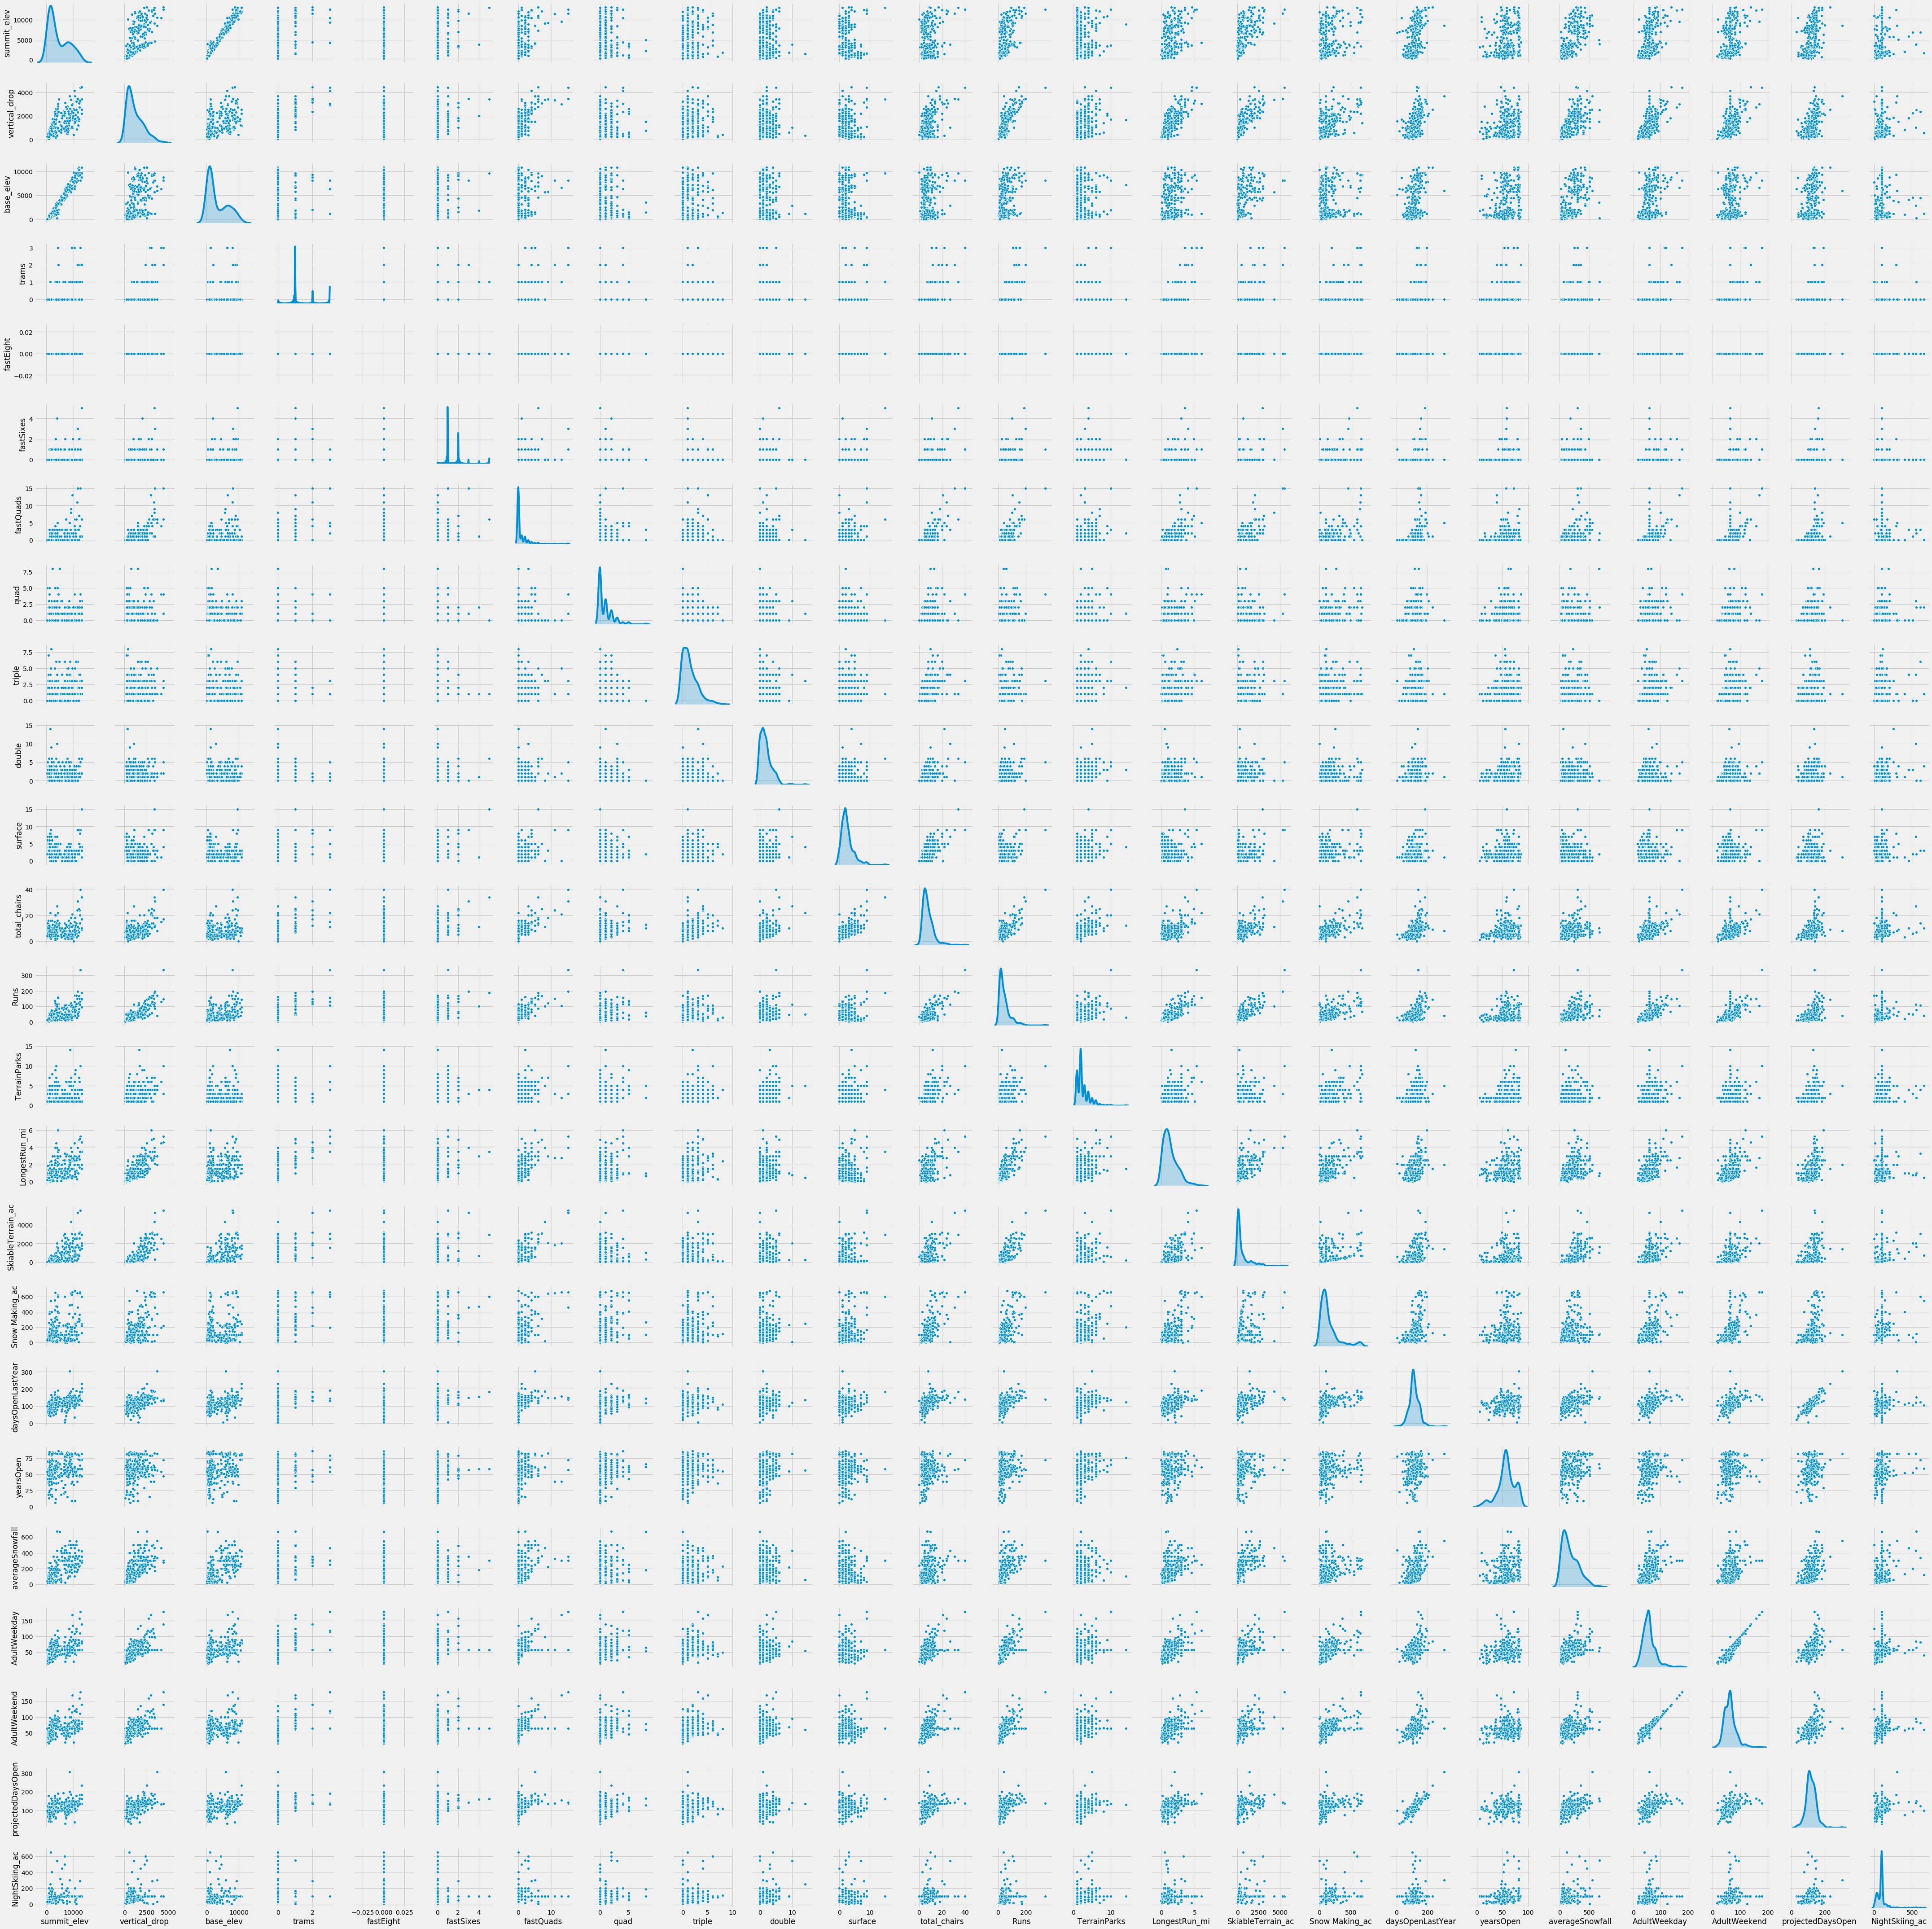

In [202]:
plt.figure(figsize=(20,20))
sns.pairplot(df, diag_kind='kde')

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

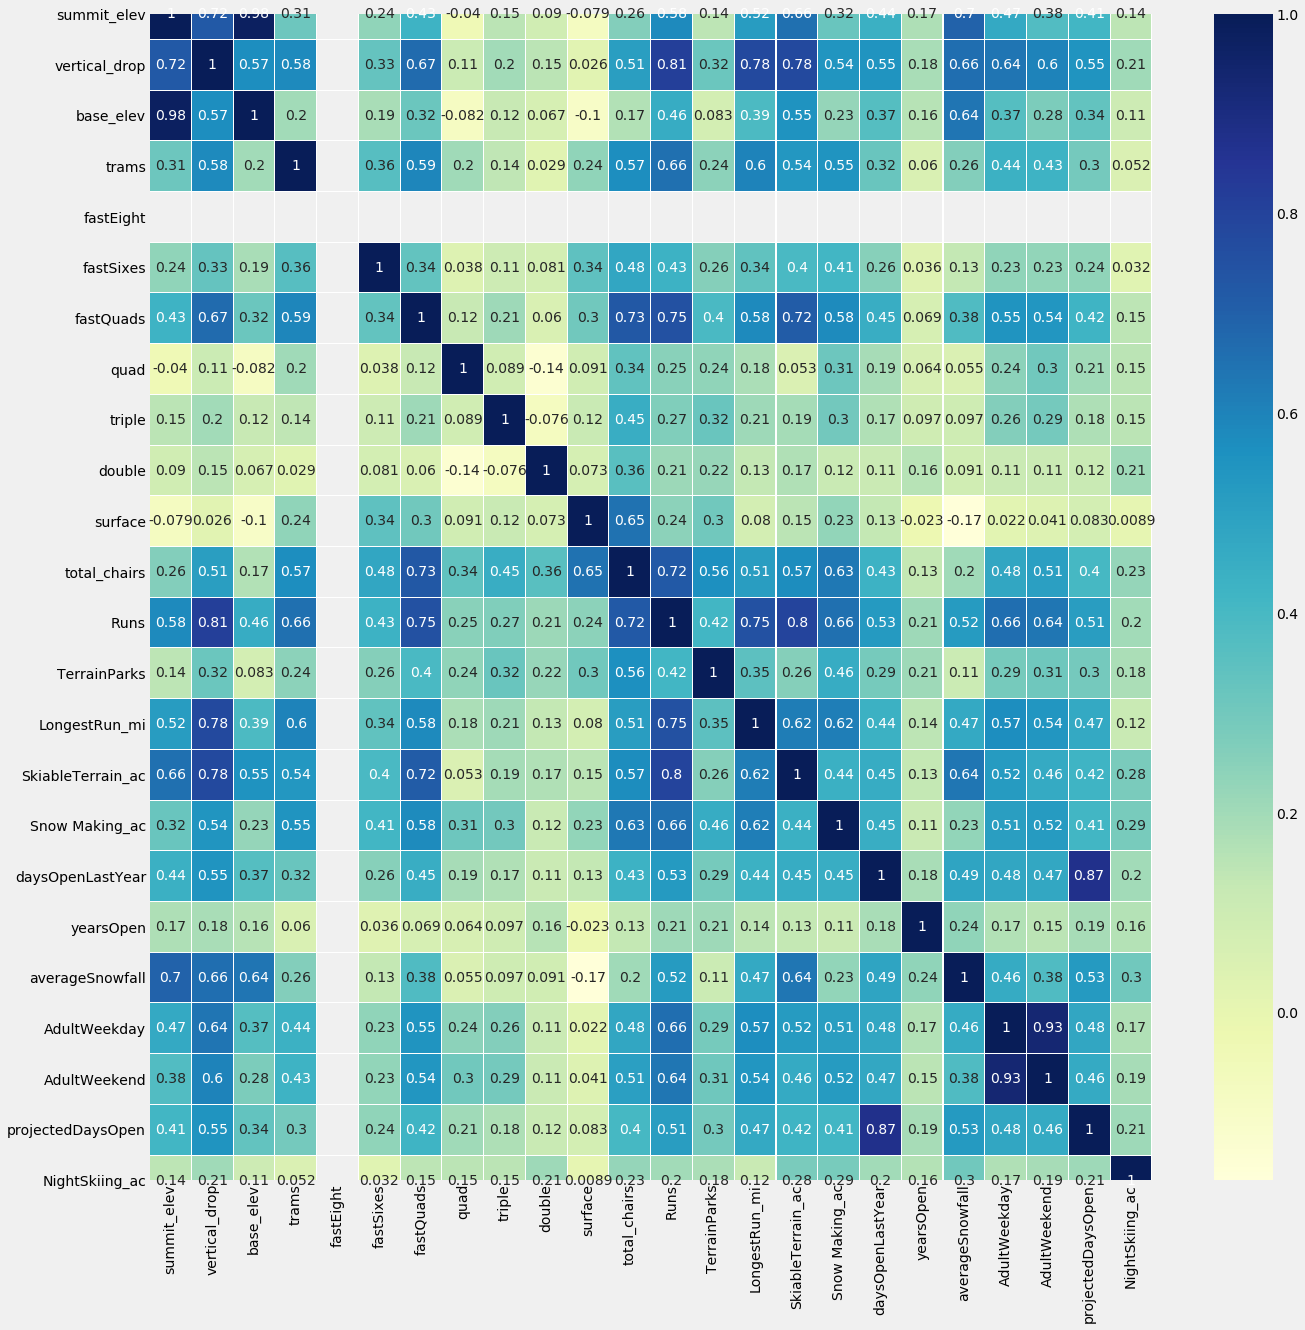

In [203]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), linewidths=.1, cmap='YlGnBu', annot=True)

When reviewing the Pearson correlation coefficient heat map, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

In [204]:
collinearity = (df.corr() >0.95) & (df.corr() < 1)

In [205]:
collinearity.any()

summit_elev           True
vertical_drop        False
base_elev             True
trams                False
fastEight            False
fastSixes            False
fastQuads            False
quad                 False
triple               False
double               False
surface              False
total_chairs         False
Runs                 False
TerrainParks         False
LongestRun_mi        False
SkiableTerrain_ac    False
Snow Making_ac       False
daysOpenLastYear     False
yearsOpen            False
averageSnowfall      False
AdultWeekday         False
AdultWeekend         False
projectedDaysOpen    False
NightSkiing_ac       False
dtype: bool

In [206]:
df_removed = df.drop(columns=['base_elev'])

Now you'll address the feature creation piece of this step. You can create additional features through many methods, such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in your model development dataset.

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps you determine the number of clusters to include in your k-means clustering implementation. In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [207]:
from sklearn.cluster import KMeans
x = df_removed.drop(['Name','state'], axis =1).values

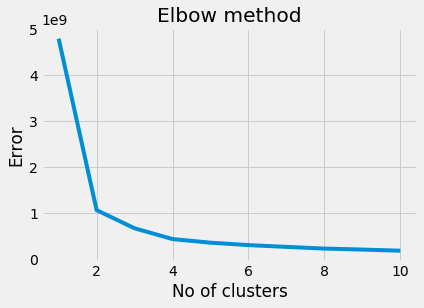

In [208]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.style.use('fivethirtyeight')
plt.show()

<font color='teal'>**Fit the k-means algorithm with the k parameter set to three and plot the results.**</font>

In [209]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [210]:
c = pd.DataFrame(y_kmeans, columns=['cluster'])
pd.concat([df_removed, c], axis = 1)

Name    state  summit_elev  vertical_drop  \
0                       Alyeska Resort   Alaska       3939.0         2500.0   
1                  Eaglecrest Ski Area   Alaska       2600.0         1540.0   
2                     Hilltop Ski Area   Alaska       2090.0          294.0   
3                     Arizona Snowbowl  Arizona      11500.0         2300.0   
4                  Sunrise Park Resort  Arizona      11100.0         1800.0   
..                                 ...      ...          ...            ...   
325               Meadowlark Ski Lodge  Wyoming       9500.0         1000.0   
326          Sleeping Giant Ski Resort  Wyoming       7428.0          810.0   
327                   Snow King Resort  Wyoming       7808.0         1571.0   
328  Snowy Range Ski & Recreation Area  Wyoming       9663.0          990.0   
329                White Pine Ski Area  Wyoming       9500.0         1100.0   

     trams  fastEight  fastSixes  fastQuads  quad  triple  ...  \
0      1.0        0.0        0.0        2.0   2.0     0.0  ...   
1      0.0        0.0        0.0        0.0   0.0     0.0  ...   
2      0.0        0.0        0.0        0.0   0.0     1.0  ...   
3      0.0        0.0        1.0        0.0   2.0     2.0  ...   
4      0.0        0.0        0.0        1.0   2.0     3.0  ...   
..     ...        ...        ...        ...   ...     ...  ...   
325    0.0        0.0        0.0        0.0   0.0     1.0  ...   
326    0.0        0.0        0.0        0.0   0.0     1.0  ...   
327    0.0        0.0        0.0        0.0   1.0     1.0  ...   
328    0.0        0.0        0.0        0.0   0.0     1.0  ...   
329    0.0        0.0        0.0        0.0   0.0     2.0  ...   

     SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
0               1610.0           113.0        150.000000       60.0   
1                640.0            60.0         45.000000       44.0   
2                 30.0            30.0        150.000000       36.0   
3                777.0           104.0        122.000000       81.0   
4                800.0            80.0        115.000000       49.0   
..                 ...             ...               ...        ...   
325              300.0           100.0        119.333333        9.0   
326              184.0            18.0         61.000000       81.0   
327              400.0           250.0        121.000000       80.0   
328               75.0            30.0        131.000000       59.0   
329              370.0           100.0        119.333333       81.0   

     averageSnowfall  AdultWeekday  AdultWeekend  projectedDaysOpen  \
0         669.000000     65.000000      85.00000         150.000000   
1         350.000000     47.000000      53.00000          90.000000   
2          69.000000     30.000000      34.00000         152.000000   
3         260.000000     89.000000      89.00000         122.000000   
4         250.000000     74.000000      78.00000         104.000000   
..               ...           ...           ...                ...   
325       292.714286     57.916957      64.16681         119.333333   
326       310.000000     42.000000      42.00000          77.000000   
327       300.000000     59.000000      59.00000         123.000000   
328       250.000000     49.000000      49.00000         131.000000   
329       150.000000     57.916957      49.00000         119.333333   

     NightSkiing_ac  cluster  
0        550.000000      0.0  
1        100.395722      0.0  
2         30.000000      0.0  
3        100.395722      1.0  
4         80.000000      1.0  
..              ...      ...  
325      100.395722      NaN  
326      100.395722      NaN  
327      110.000000      NaN  
328      100.395722      NaN  
329      100.395722      NaN  

[330 rows x 26 columns]

C:\Users\Donghyeok\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Donghyeok\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Donghyeok\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Donghyeok\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


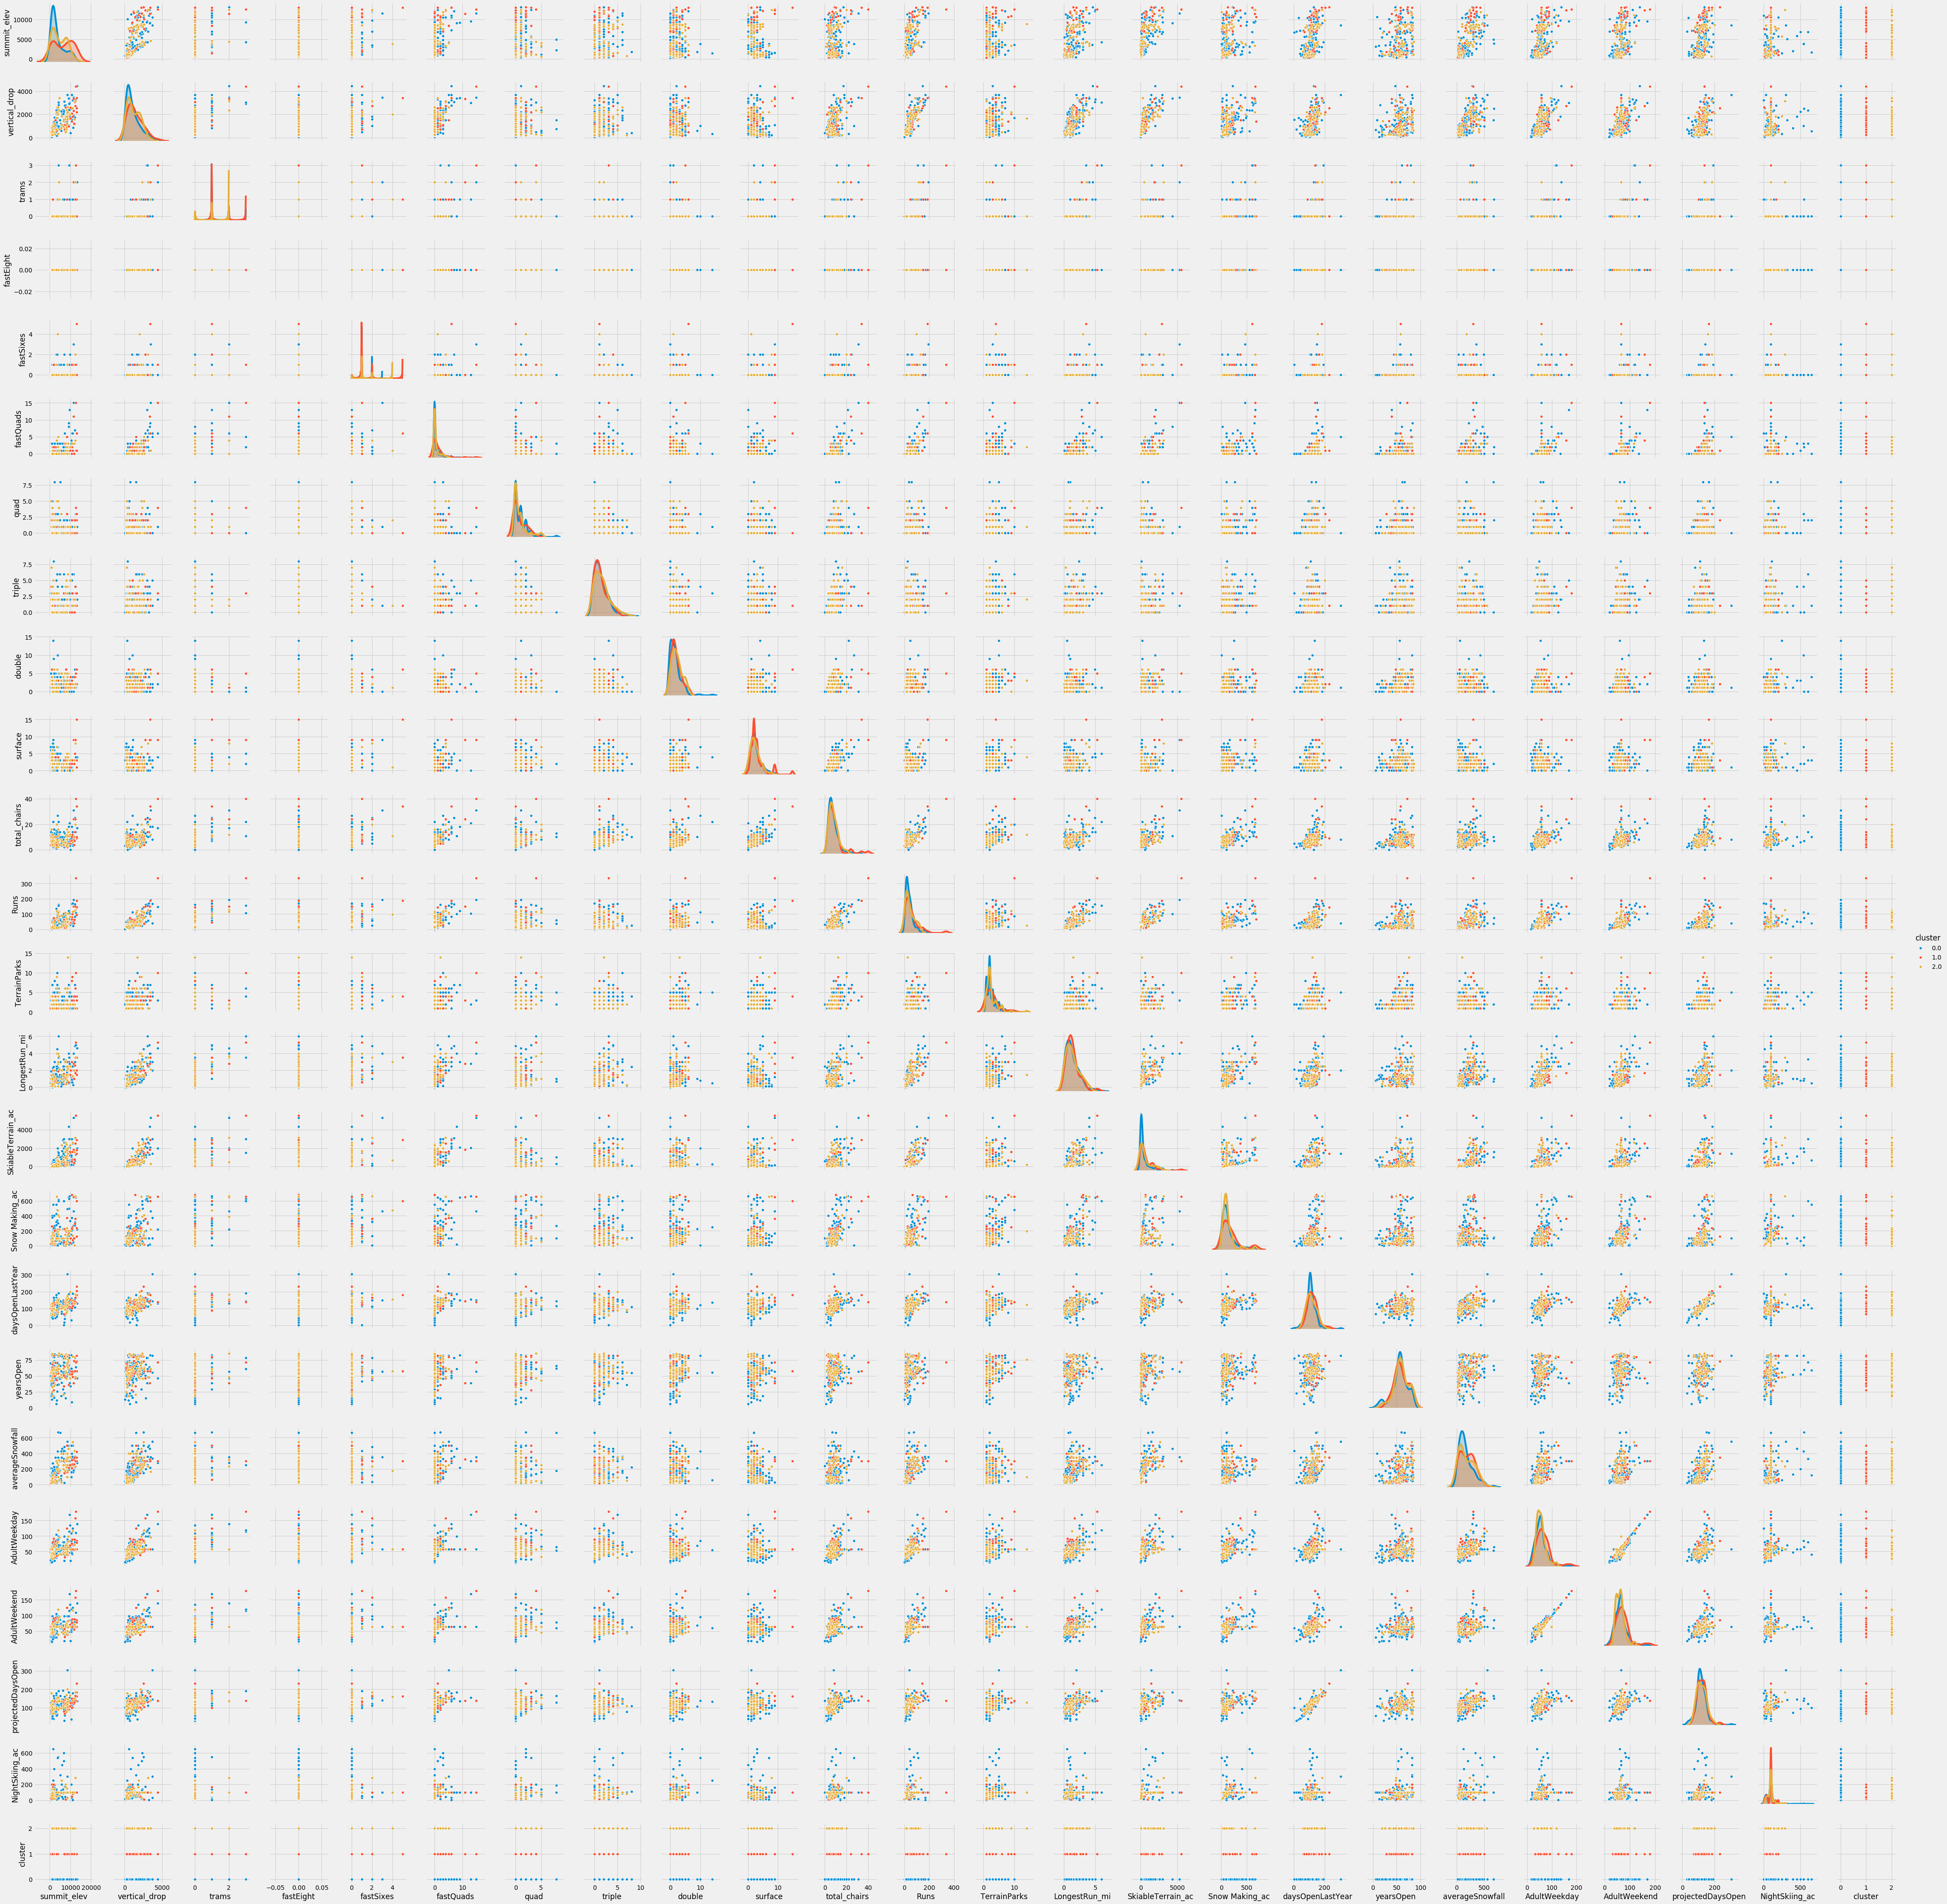

In [211]:
sns.pairplot(pd.concat([df_removed, c], axis=1), hue='cluster', diag_kind='kde')

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step of the guided capstone and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [212]:
df_removed['Cluster'] = y_kmeans

In [213]:
df_removed

Name    state  summit_elev  vertical_drop  \
0                       Alyeska Resort   Alaska         3939           2500   
1                  Eaglecrest Ski Area   Alaska         2600           1540   
2                     Hilltop Ski Area   Alaska         2090            294   
3                     Arizona Snowbowl  Arizona        11500           2300   
4                  Sunrise Park Resort  Arizona        11100           1800   
..                                 ...      ...          ...            ...   
325               Meadowlark Ski Lodge  Wyoming         9500           1000   
326          Sleeping Giant Ski Resort  Wyoming         7428            810   
327                   Snow King Resort  Wyoming         7808           1571   
328  Snowy Range Ski & Recreation Area  Wyoming         9663            990   
329                White Pine Ski Area  Wyoming         9500           1100   

     trams  fastEight  fastSixes  fastQuads  quad  triple  ...  \
0        1        0.0          0          2     2       0  ...   
1        0        0.0          0          0     0       0  ...   
2        0        0.0          0          0     0       1  ...   
3        0        0.0          1          0     2       2  ...   
4        0        0.0          0          1     2       3  ...   
..     ...        ...        ...        ...   ...     ...  ...   
325      0        0.0          0          0     0       1  ...   
326      0        0.0          0          0     0       1  ...   
327      0        0.0          0          0     1       1  ...   
328      0        0.0          0          0     0       1  ...   
329      0        0.0          0          0     0       2  ...   

     SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
0               1610.0           113.0        150.000000       60.0   
1                640.0            60.0         45.000000       44.0   
2                 30.0            30.0        150.000000       36.0   
3                777.0           104.0        122.000000       81.0   
4                800.0            80.0        115.000000       49.0   
..                 ...             ...               ...        ...   
325              300.0           100.0        119.333333        9.0   
326              184.0            18.0         61.000000       81.0   
327              400.0           250.0        121.000000       80.0   
328               75.0            30.0        131.000000       59.0   
329              370.0           100.0        119.333333       81.0   

     averageSnowfall  AdultWeekday  AdultWeekend  projectedDaysOpen  \
0         669.000000     65.000000      85.00000         150.000000   
1         350.000000     47.000000      53.00000          90.000000   
2          69.000000     30.000000      34.00000         152.000000   
3         260.000000     89.000000      89.00000         122.000000   
4         250.000000     74.000000      78.00000         104.000000   
..               ...           ...           ...                ...   
325       292.714286     57.916957      64.16681         119.333333   
326       310.000000     42.000000      42.00000          77.000000   
327       300.000000     59.000000      59.00000         123.000000   
328       250.000000     49.000000      49.00000         131.000000   
329       150.000000     57.916957      49.00000         119.333333   

     NightSkiing_ac  Cluster  
0        550.000000        0  
1        100.395722        0  
2         30.000000        0  
3        100.395722        1  
4         80.000000        1  
..              ...      ...  
325      100.395722        1  
326      100.395722        2  
327      110.000000        2  
328      100.395722        1  
329      100.395722        1  

[319 rows x 26 columns]

In [214]:
df_removed.to_csv('data/step3_output.csv', index=False)